# Exploratory Data Analysis Of Car Sales

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/><br/>
    - 3.5 [Establish correlation between all the features using heatmap.](#section305)<br/>
4. [Questions](#section4)
    - 4.1 [What is the price distribution of cars in the data set?](#section401)<br/>
    - 4.2 [How does car body influence sales?](#section402)<br/>
    - 4.3 [How does body type influence efficiency?](#section403)<br/>
    - 4.4 [How does price influence efficiency with respect to body?](#section404)<br/>
    - 4.5 [How does engine type influence sales?](#section405)<br/>
    - 4.6 [How does engine type influence price?](#section406)<br/>
    - 4.7 [How does price influence efficiency with respect to engine type?](#section407)<br/>
    - 4.8 [How does engine drive influence sales?](#section408)<br/>
    - 4.9 [How does engine drive influence price?](#section409)<br/>
    - 4.10 [How does price influence efficiency with respect to drive?](#section410)<br/>
    - 4.11 [How are car sales affected by year?](#section411)<br/>
    - 4.12 [How is efficiency score influenced by year?](#section412)<br/>
    - 4.13 [How does the engine volume differ with year?](#section413)<br/>
    - 4.14 [How is mileage influenced by year?](#section414)<br/>
    - 4.15 [How are price trends influenced by year?](#section415)<br/>
    - 4.16 [Assumption 1 : Engine efficiency has played a role in car sale trends over the last 5 years.](#section417)<br/>
    - 4.17 [Assumption 2 : Engine efficiency to price plays an important role in car sale trends with respect to engine drive and car body.](#section418)<br/><br/>
5. [Conclusions](#section5)<br/>  

<a id='section1'></a>
### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ to dive into the dataset of Car Sales. This dataset will be analysed using some basic statistical tools and charts. The primary objective is to understand and analyse the impact of the various factors(year,engine type, engine volume, mileage,drive, etc.) on the sales trends of cars.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id='section2'></a>
### 2. Data Loading and Description

- The dataset consists of the information about Car sales. We use this data to test hypotheses as well as explore patterns within the data in this notebook. 
- The dataset comprises of __9576 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| car           | Car brand                                                 | 
| price      | Price of the car                        |  
| body        | Type of body                                           | 
| mileage          | Mileage given by the car                                         |   
| engV           | Volume of the engine                                          |
| engType           | Type of fuel on which the car runs                                          |
| registration         | Car registration status |
| year         | Year of manufacture of the car|
| model        | Model of the car                                             |
| drive          | Front, rear or Full drive                                           |

#### Importing packages                                          

In [12]:
import numpy as np                                                 # To implemennt milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides high level informative statistical graphics
%matplotlib inline

#### Importing the Dataset

In [13]:
car_sales_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='iso-8859-1')
car_sales_df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


<a id='section3'></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns.
- After that, we will do __pandas profiling__ to see how preprocessing have transformed our dataset and add the necessary columns to better understand our problem statement.

<a id='section301'></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of the data and try to gain some insights of the shape and structure of the data.


In [14]:
car_sales_df.shape                                                               #Checking the shape of the data

(9576, 10)

In [15]:
car_sales_df.head(10)                                                            #Checking the first 10 rows of data

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [16]:
car_sales_df.info()                                                  # This will give Index, Datatype and Memory information
                                                                     # From this data we can see the datatype of the columns,
                                                                     # total number of rows as well as where the data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [17]:
car_sales_df.describe()                                      #This shows us a clear overview of the descriptive statistics 
                                                             #of the numerical data including central tendency, IQR etc.

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [18]:
car_sales_df.describe(include='all')                        #Here we get an overview of the non-numerical data as well which will
                                                            #only give us frequency and number of unique values present in the data

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [19]:
car_sales_df.isnull().sum()                                  #Here we can see the number of NULL values in the following columns

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From these outputs we can see : 
- The dataset contains 4 numerical fields : price,mileage,engV,year. The other columns are categorical.
- The columns engV and drive both contain missing/NULL values(434 and 511 respectively).

<a id='section302'></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(car_sales_df)
profile.to_file(outputfile="car_sales_preprocessing_df.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __car_sales_df.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id='section303'></a>
### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __engV__ with the median.
    - Dropping rows with missing values of __drive.__
    - Replacing 0 values of __mileage__ with median values as mileage ideally is not 0.

In [20]:
#Replacing the missing values of engV with the median value
car_sales_df['engV'] = car_sales_df['engV'].fillna(car_sales_df['engV'].median()) #Replaces NaN values with median
car_sales_df['engV'][car_sales_df['engV'].isnull()].count()                       #To show that we do not have any NaN values

0

In [21]:
#Dropping the rows which have missing values of drive
car_sales_df = car_sales_df.dropna()                                              #Drops the rows with missing values of drive
car_sales_df['drive'][car_sales_df['drive'].isnull()].count()                     #To show that we do not have any NaN values

0

In [22]:
#Replacing the 0 values of mileage with the median value as mileage can not be 0
print(car_sales_df['mileage'][car_sales_df['mileage'] == 0].count())                            #Before replacing 0 with median
car_sales_df['mileage'] = car_sales_df['mileage'].replace(0,car_sales_df['mileage'].median())   #Replacing 0 values
print(car_sales_df['mileage'][car_sales_df['mileage'] == 0].count())                            #After replacing 0 with median

335
0


In [23]:
#Removing outliers for the engV column as it will skew the values we get while creating the new column
#Taking 2 standard deviations on the engV column to remove outliers
car_sales_df = car_sales_df[(car_sales_df['engV'] < car_sales_df['engV'].mean() + 2 * car_sales_df['engV'].std()) & (car_sales_df['engV'] > car_sales_df['engV'].mean() - 2 * car_sales_df['engV'].std())]

##### Assumption :

Assuming that an engine 'A' which gives twice the __mileage__ than another engine 'B', with the same __engV__, is twice as efficient as engine 'B' __(or)__ an engine 'A' with double the __engV__ and gives the same __mileage__ as an engine 'B' is twice as efficient as engine 'B'. We can calculate an efficiency score as a function of __engV__ and __mileage__ as shown below:

In [24]:
#Creating a new columm called Efficiency score to gauge how efficient a car is by taking mileage*engVolume
#Since the values are directly proportional to the efficiency of the car(higher engV OR higher mileage leads to more efficiency)
car_sales_df['Efficiency score'] = car_sales_df['mileage']*car_sales_df['engV'] 
car_sales_df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive,Efficiency score
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full,170.0
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear,311.4
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear,742.5
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front,291.6
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,166.0
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front,398.0
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front,277.5
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear,262.8
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear,275.0
10,Nissan,20447.154,crossover,128,1.2,Petrol,yes,2016,Qashqai,front,153.6


<a id='section304'></a>
### 3.4 Post Pandas Profiling

In [19]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(car_sales_df)
profile.to_file(outputfile="car_sales_postprocessing_df.html")

Now we have preprocessed the data, now the dataset doesnot contain missing or erroneous values, we have also introduced new feature named __Efficiency score__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights as the data is cleaner and more easily understandable. You can compare the two reports, i.e __car_sales_preprocessing_df.html__ and __car_sales_postprocessing_df.html__.<br/>
In __car_sales_postprocessing_df.html__ report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __12__ 
- Observe the newly created variable Efficiency Score, Click on Toggle details to get more detailed information about it.

<a id='section305'></a>
### 3.5 Establish correlation between all the features using heatmap.

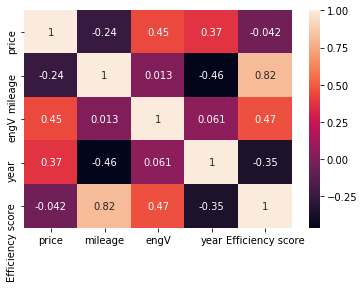

In [25]:
c = car_sales_df.corr()
sns.heatmap(c,annot=True)

From the above heatmap representing correlation of different features, the things to notice are:
 - __year__ and __engV__ are slightly positively correlated to __price__.
 - __Efficiency score__ is derived from __mileage__ and __engV__ so it is strongly correlated with both of them.
 - __year__ and __mileage__ are mildly negatively correlated.
 - __mileage__ and __price__ are also mildly negatively correlated.

<a id='section4'></a>
## 4. Questions

<a id='section401'></a>
### 4.1 What is the price distribution of cars in the data set?

Segment data based on their price:

In [26]:
price_segments = np.linspace(car_sales_df['price'].min(), car_sales_df['price'].max(), num=10)
price_segments

array([     0.        ,  60866.66666667, 121733.33333333, 182600.        ,
       243466.66666667, 304333.33333333, 365200.        , 426066.66666667,
       486933.33333333, 547800.        ])

In [34]:
car_tier1_df = car_sales_df.copy()
car_tier1_df = car_tier1_df[(car_tier1_df['price'] > price_segments[0]) & (car_tier1_df['price'] < price_segments[1])]
percentage_of_cars_in_segment1 = (car_tier1_df.count()/car_sales_df.count())*100
percentage_of_cars_in_segment1

car                 93.439716
price               93.439716
body                93.439716
mileage             93.439716
engV                93.439716
engType             93.439716
registration        93.439716
year                93.439716
model               93.439716
drive               93.439716
Efficiency score    93.439716
dtype: float64

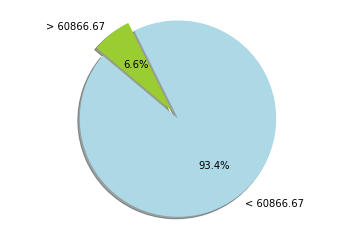

In [35]:
# Distribution of car sales by body type
labels = '< 60866.67','> 60866.67'
sizes = [percentage_of_cars_in_segment1[0],(100-percentage_of_cars_in_segment1[0])]
colors = ['lightblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

From the above output we can see that a majority of cars lies within __60866.66__ the first segment. This shows that budget car sales are much higher than cars with mid or high price points.

<a id='section402'></a>
### 4.2 How does car body influence sales?

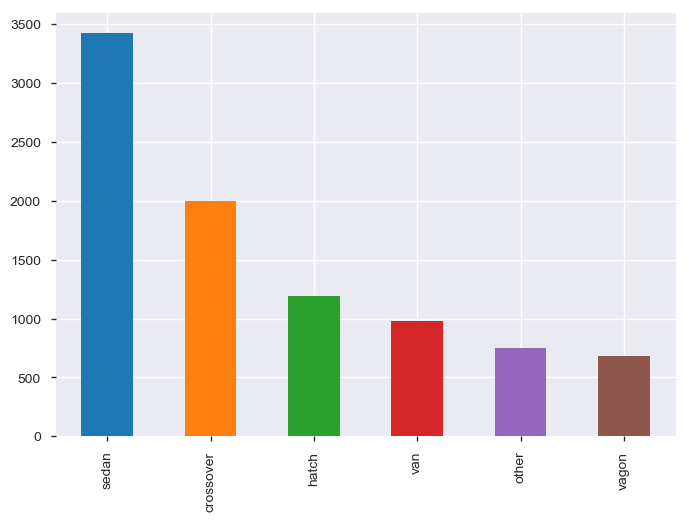

In [48]:
#Using a bar chart to plot the body against the count of cars sold
car_sales_df['body'].value_counts().head(10).plot.bar()

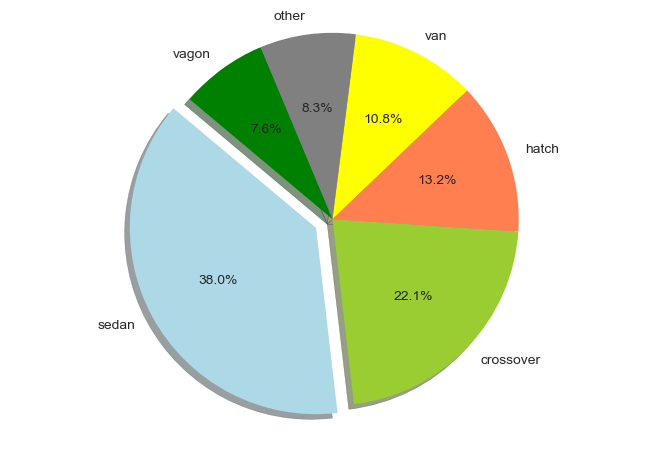

In [254]:
# Distribution of car sales by body type
labels = 'sedan','crossover','hatch','van','other','vagon'
sizes = car_sales_df['body'].value_counts()
colors = ['lightblue', 'yellowgreen', 'coral', 'yellow','grey','green']
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

From the above graphs we can see that __sedans__ were the highest sold cars, followed by __crossovers__ and __hatches__.

<a id='section403'></a>
### 4.3 How does body type influence efficiency?

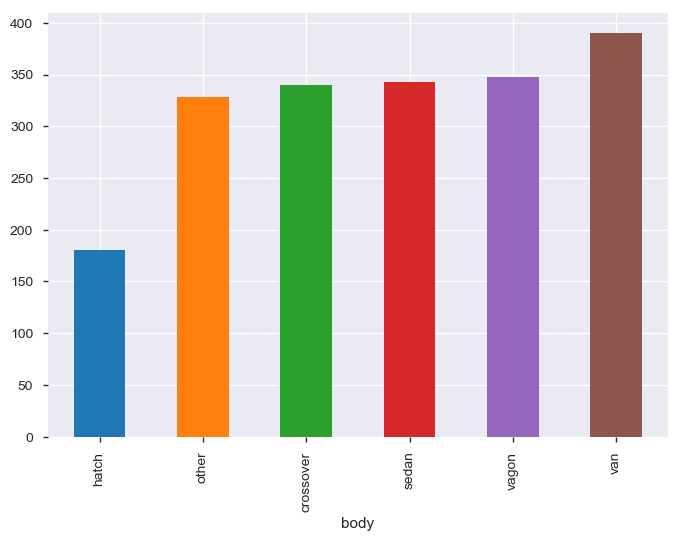

In [115]:
grouped = car_sales_df.groupby('body')
test = grouped['Efficiency score'].agg(np.mean)
test = test.sort_values().tail(10)
test.plot(kind='bar')

From figure 4.2, we can see that __vans__ are the most efficient, followed closely by __vagons__ and __sedans__.

<a id='section404'></a>
### 4.4 How does price influence efficiency with respect to body?

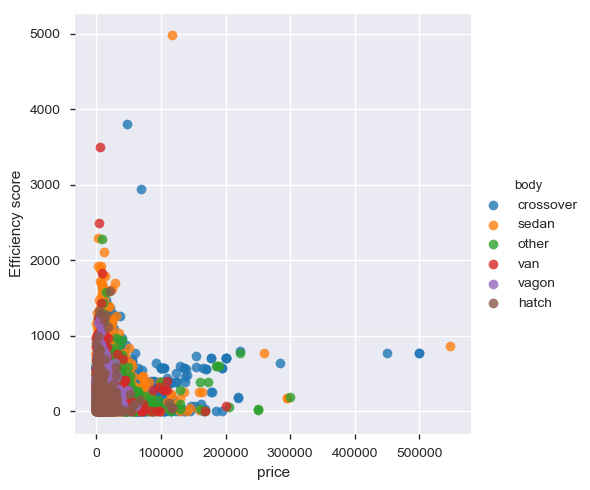

In [76]:
sns.lmplot(x='price', y='Efficiency score', hue='body', 
           data=car_sales_df, 
           fit_reg=False)

From the above output we can see that __sedans__ have a higher efficiency at a lower __price__. That means the efficiency with respect to lower price points is high.

For a better understanding, from __Figure 4.3__, taking the 3 most efficient body types and plotting them against price, we can see how efficienct each of the 3 body types are at the __same__ price points.

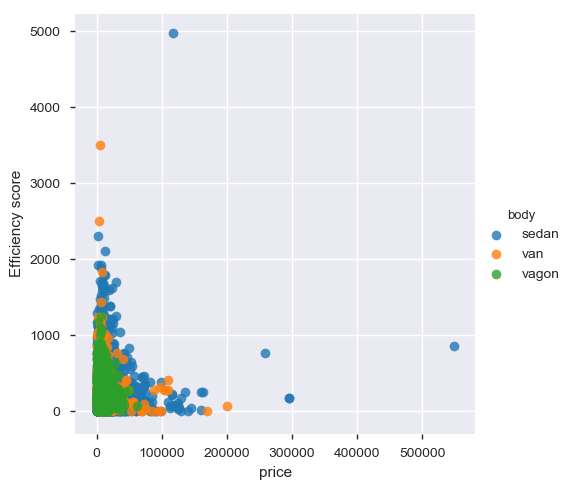

In [294]:
sns.lmplot(x='price', y='Efficiency score', hue='body', 
           data=car_sales_df.loc[car_sales_df['body'].isin(['sedan','van','vagon'])], 
           fit_reg=False)

From the above graph we can see that there are __sedans__ which are much more efficient at similar price points(especially lower) to __vans__ and __vagons__ even though the overall mean efficiency of __sedans__ are slightly lower than __vans__ and __vagons__.

<a id='section405'></a>
### 4.5 How does engine type influence sales?

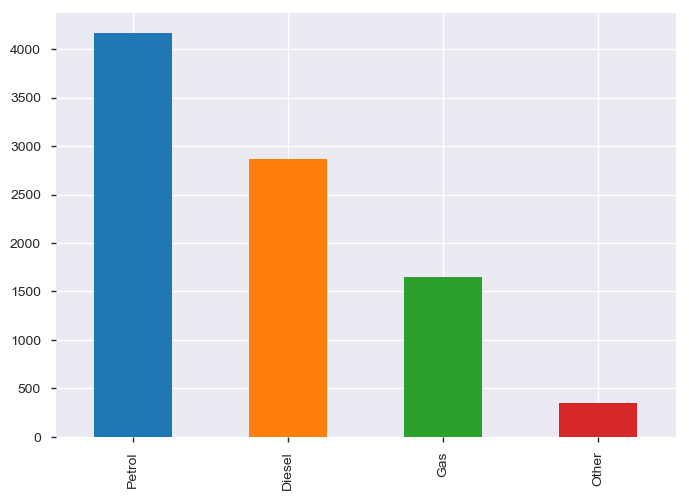

In [83]:
#Using a bar chart to plot the engnie type against the count of cars sold
car_sales_df['engType'].value_counts().head(10).plot.bar()

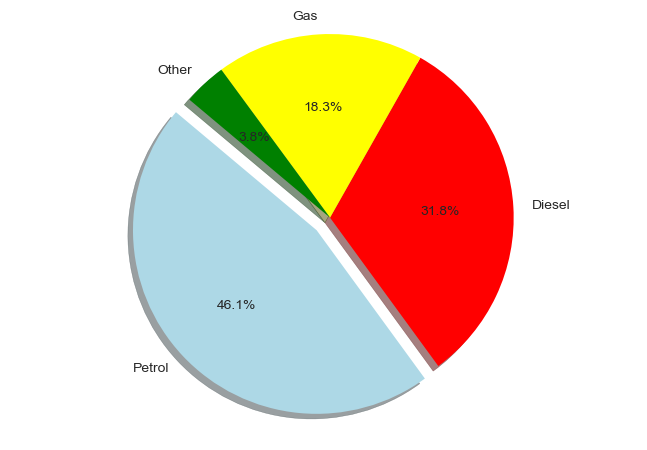

In [90]:
# Distribution of car sales by engine type
labels = 'Petrol','Diesel','Gas','Other'
sizes = car_sales_df['engType'].value_counts()
colors = ['lightblue', 'red','yellow','green']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<a id='section406'></a>
### 4.6 How does engine type influence price?

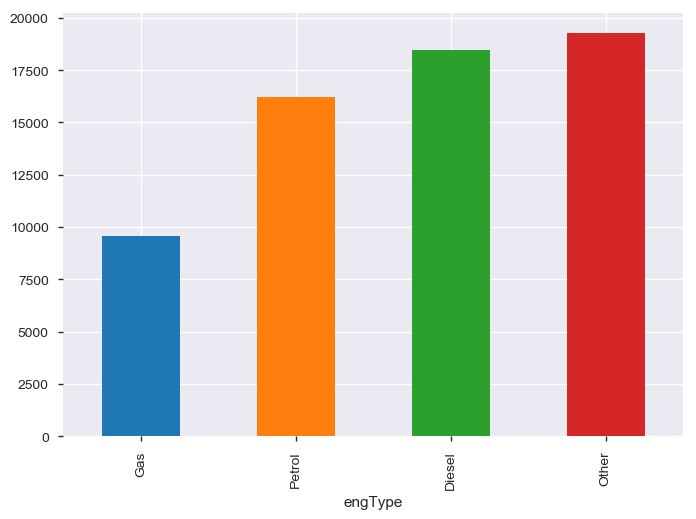

In [414]:
grouped = car_sales_df.groupby('engType')
test = grouped['price'].agg(np.mean)
test = test.sort_values().tail(10)
test.plot(kind='bar')

From figure 4.6 we can observe that __petrol__ and __gas__ have a lower mean price than __Diesel__ and __Other__. 

<a id='section407'></a>
### 4.7 How does price influence efficiency with respect to engine type?

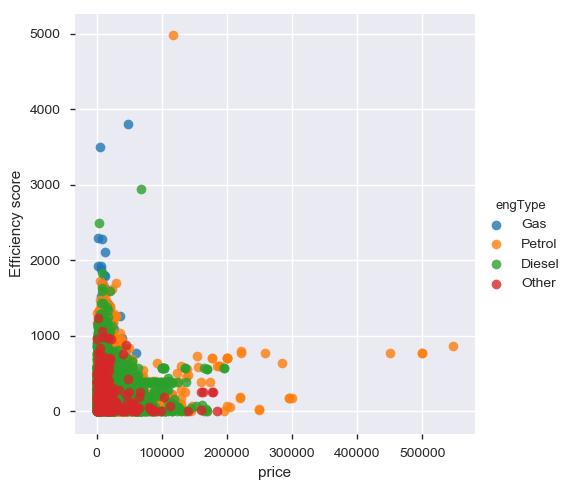

In [431]:
sns.lmplot(x='price', y='Efficiency score', hue='engType', 
           data=car_sales_df.loc[car_sales_df['engType'].isin(['Diesel','Petrol','Gas','Other'])], 
           fit_reg=False)

From the above output we observe that the efficiency for all types except for __Other__ is relatively equal at low price points. At higher price points, __Diesel__ and __Petrol__ are more efficient.

<a id='section408'></a>
### 4.8 How does engine drive influence sales?

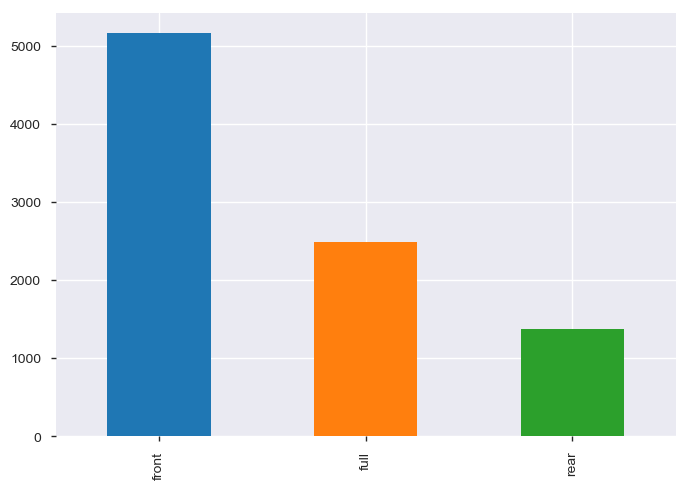

In [253]:
#Using a bar chart to plot the engnie drive against the count of cars sold
car_sales_df['drive'].value_counts().head(10).plot.bar()

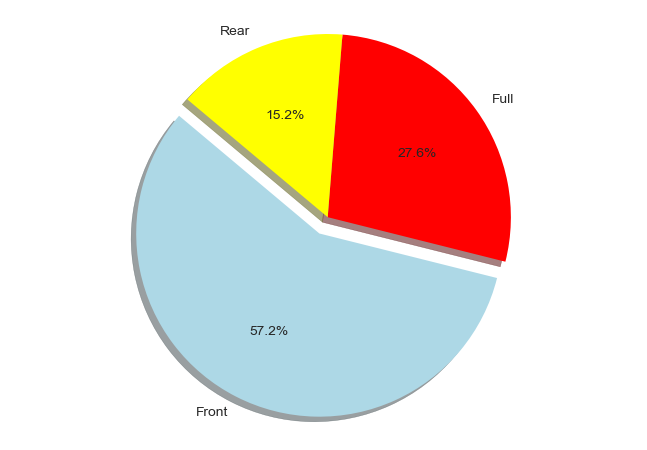

In [117]:
# Distribution of car sales by engine type
labels = 'Front','Full','Rear'
sizes = car_sales_df['drive'].value_counts()
colors = ['lightblue', 'red','yellow']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<a id='section409'></a>
### 4.9 How does engine drive influence price?

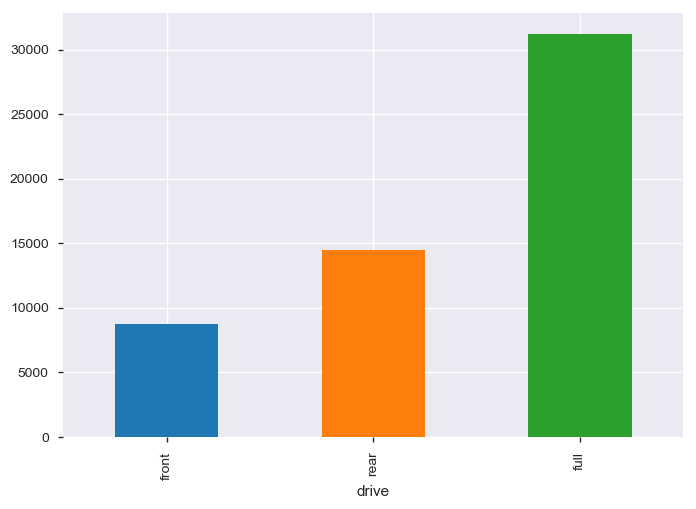

In [417]:
grouped = car_sales_df.groupby('drive')
test = grouped['price'].agg(np.mean)
test = test.sort_values().tail(30)
test.plot(kind='bar')

<a id='section410'></a>
### 4.10 How does price influence efficiency with respect to drive?

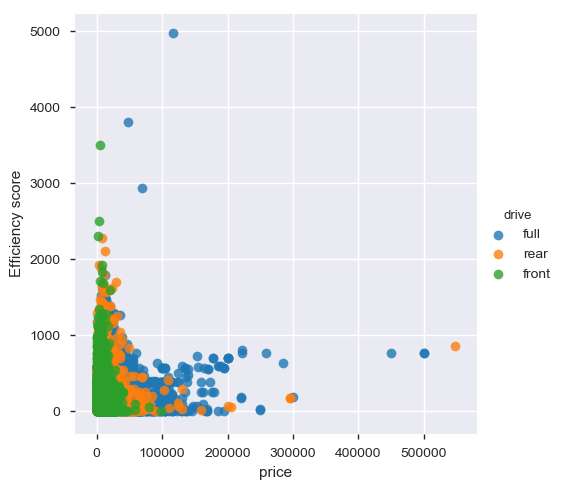

In [147]:
sns.lmplot(x='price', y='Efficiency score', hue='drive', 
           data=car_sales_df.loc[car_sales_df['drive'].isin(['full','rear','front'])], 
           fit_reg=False)

Segmenting the car prices into 10 equal segments to see how the efficiency varies with different price segments.

In [206]:
price_segments = np.linspace(car_sales_df['price'].min(), car_sales_df['price'].max(), num=10)
price_segments

array([     0.        ,  60866.66666667, 121733.33333333, 182600.        ,
       243466.66666667, 304333.33333333, 365200.        , 426066.66666667,
       486933.33333333, 547800.        ])

Comparing efficiencies of cars at the lowest price segment.

In [214]:
car_tier1_df = car_sales_df.copy()
car_tier1_df = car_tier1_df[(car_tier1_df['price'] > price_segments[0]) & (car_tier1_df['price'] < price_segments[1])]
car_tier1_df.count()

car                 8432
price               8432
body                8432
mileage             8432
engV                8432
engType             8432
registration        8432
year                8432
model               8432
drive               8432
Efficiency score    8432
dtype: int64

From the above output we can see that a majority of cars(8432) bought, lie in the lowest segment.

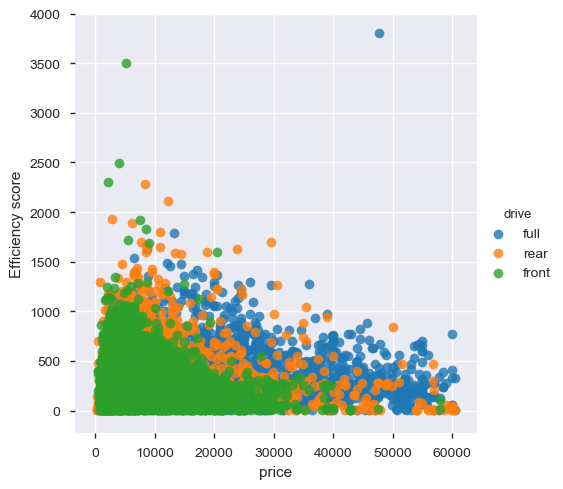

In [427]:
sns.lmplot(x='price', y='Efficiency score', hue='drive', 
           data=car_tier1_df.loc[car_tier1_df['drive'].isin(['full','rear','front'])], 
           fit_reg=False)

From the above graph we can see that:
 - __rear__ and __front__ drive cars are more efficient at the very low price range.
 - As the price increases, the efficiency of the __full__ and __rear__ drive cars is higher than __front__ wheel drive cars. 

<a id='section411'></a>
### 4.11 How are car sales affected by year?

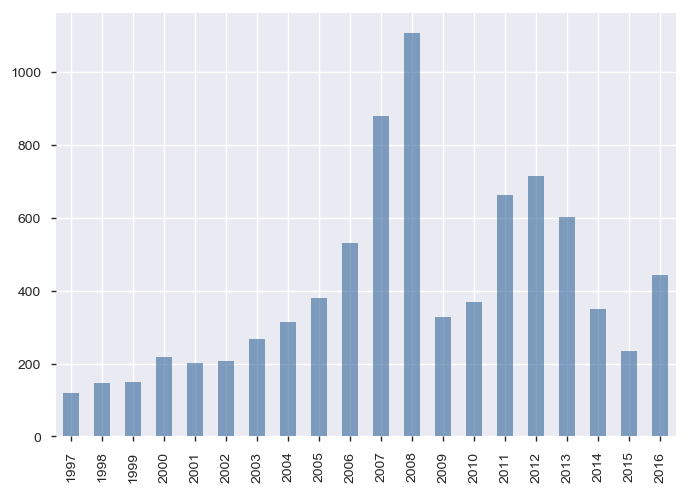

In [481]:
#Using a bar chart to plot the years against the count of cars sold
car_sales_df['year'].value_counts().head(20).sort_index().plot.bar(color=(0.2, 0.4, 0.6, 0.6))

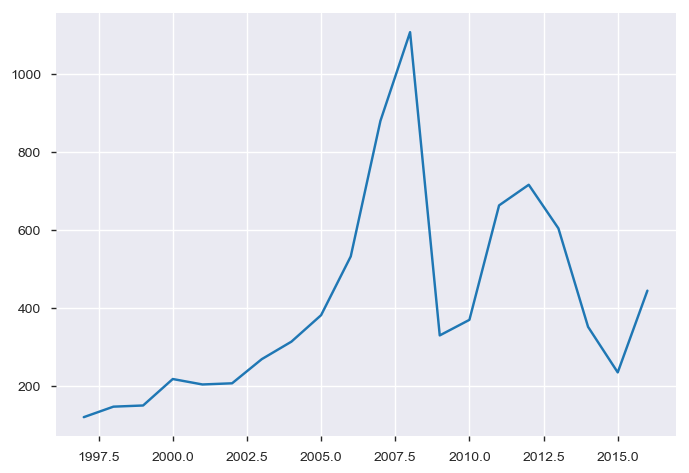

In [482]:
car_sales_df['year'].value_counts().head(20).sort_index().plot.line()

Between the years __2012__ and __2015__, the number of car sales has decreased with a spike in __2016__.

<a id='section412'></a>
### 4.12 How is efficiency score influenced by year?

Text(0, 0.5, 'Efficiency Score')

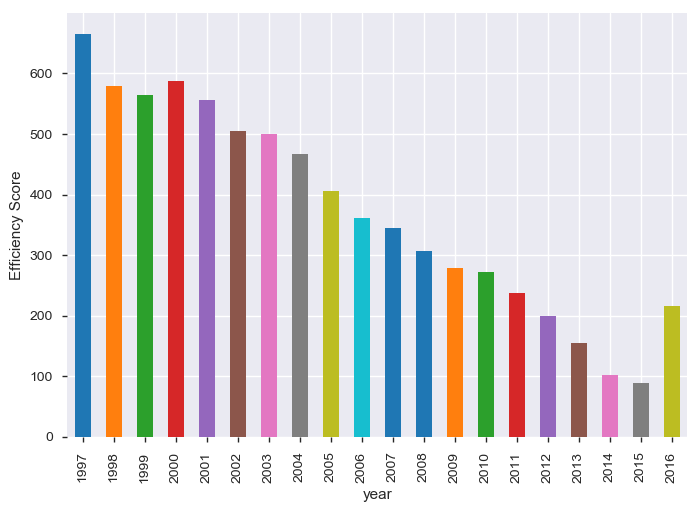

In [449]:
#Using a bar chart to plot the efficiency score against the count of cars sold
grouped = car_sales_df[car_sales_df['year'] > 1996].groupby('year')
test = grouped['Efficiency score'].agg(np.mean)
test = test.sort_index().tail(30)
output = test.plot(kind='bar')
output.set_ylabel("Efficiency Score")

From the figure 4.11 we can see that __Efficiency score__ is negatively correlated to the __year__ and has been on a downward trend over the last few years with a sudden spike in __2016__.

<a id='section413'></a>
### 4.13 How does the engine volume differ with year?

Text(0, 0.5, 'Engine Volume')

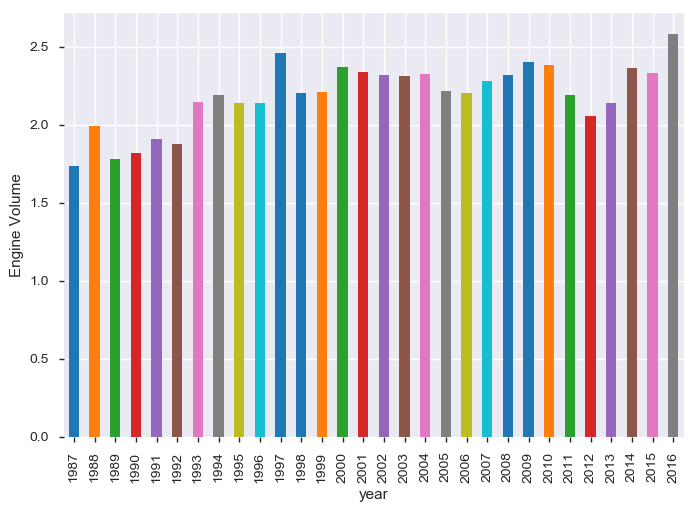

In [448]:
grouped = car_sales_df.groupby('year')
test = grouped['engV'].agg(np.mean)
test = test.sort_index().tail(30)
output = test.plot(kind='bar')
output.set_ylabel("Engine Volume")

The graph above shows that the __Engine Volume (engV)__ has stayed relatively constant in the last 10 years, with a slight dip in __2012__ and a spike in __2016__.

<a id='section414'></a>
### 4.14 How is mileage influenced by year?

Text(0, 0.5, 'Mileage')

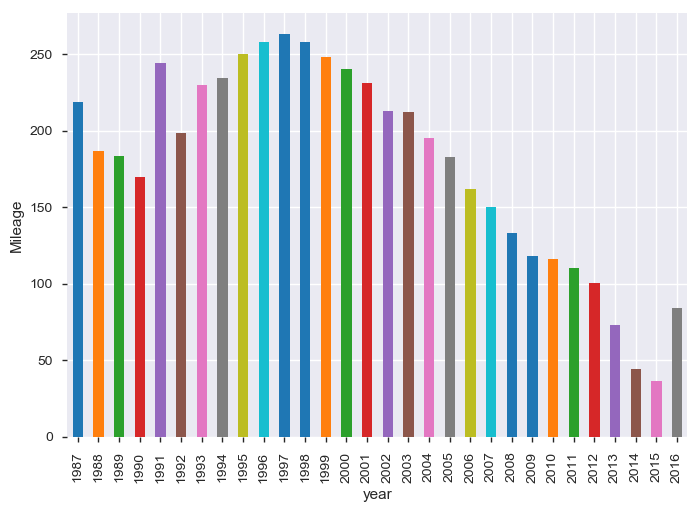

In [450]:
grouped = car_sales_df.groupby('year')
test = grouped['mileage'].agg(np.mean)
test = test.sort_index().tail(30)
test.plot(kind='bar')
output = test.plot(kind='bar')
output.set_ylabel("Mileage")

From the output above, we can see that there is a downward trend in __mileage__ in the last 10 years with respect to the __year__ except for a slight spike in 2016.

<a id='section415'></a>
### 4.15 How are price trends influenced by year?

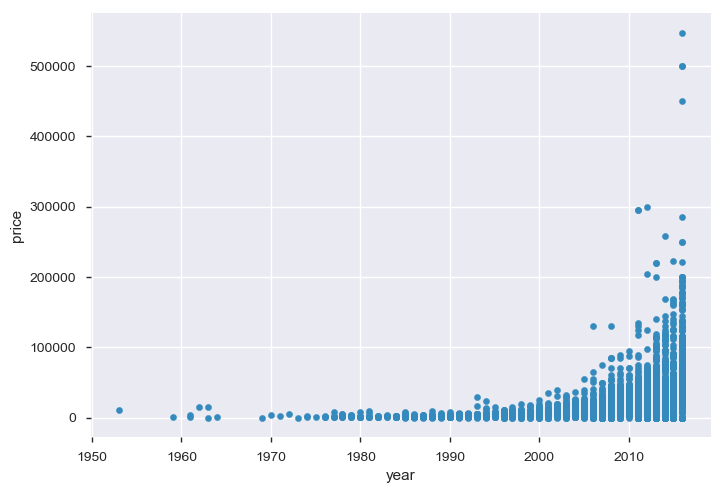

In [344]:
car_sales_df.plot.scatter(x='year', y='price')

From the above graphs, we observe that __price__ is positively correlated to __year__ and has been steadily increasing over the years.

<a id='section417'></a>
### 4.17 Assumption 1 : Engine efficiency has played a role in car sale trends over the last 5 years

On studying the questions 4.12,4.13 and 4.14, we can observed that:
 - __Efficiency score__ is calculated from __Mileage__ and __engV__ and has been steadily decreasing over the years until 2016.
 - __Mileage__ has also been decreasing over the years until 2016.
 - __Engine Volume (engV)__ has stayed relatively constant over the last 15 years.
 
Since the engine volume has stayed relatively constant over the years and mileage on average has gone down, we can say that the efficiency of cars has been decreasing which is echoed in our graph of __Efficiency score__.

On studying the questions 4.11 and 4.12 from the year 2011, we can see that:
- The sales of cars increased very slightly in 2012 but has fallen drastically until the year 2015. During this time from the figure 4.11 we can see that __Efficiency score__ is steadily decreasing.
- The sales of cars saw a steep increase in 2016. From the figure 4.11, we observe that during this time, the __Efficiency score__ of cars also went up during this year.

This reinforces the fact that the __Efficiency score__ of cars played a part in car sales in the last 5 years.

<a id='section418'></a>
### 4.18 Assumption 2 : Engine efficiency to price plays an important role in car sale trends with respect to engine drive and car body.

__With respect to engine drive__ :
- On studying the questions 4.1, 4.8, 4.9 and 4.10, we can observe that :
    - From the figure 4.8, we can see that __front__ wheel drive cars are the most sold with 57.2% of all car sales.
    - We can observe from figure 4.9, that __front__ wheel drive cars also have the lowest mean price among all other types of car drives.
    - From the graph 4.9 and 4.10, we can understand that __front__ wheel drive cars are approximately as efficient at lower price ranges as __rear__ wheel drive cars but on average are cheaper.
    - Finally, we can see from 4.1 that most cars are bought in the lower price segment, hence __front__ wheel drive cars are bought more than __rear__ despite the similar efficiencies at lower prices.

From the above observations we can see that __front__ wheel drive cars are the most bought as they are more efficient than __full__ drive cars at lower price points and cheaper than __rear__ wheel drive cars.

__With respect to the car body__ :
- On studying the questions 4.1, 4.2, 4.3 and 4.4, we can observe that :
    - From the graph 4.2, __Sedans__ are the most sold car with 38% of all car bodies sold.
    - From the graph of 4.4, we can see that __Sedans(Which had the highest sales)__ are the most efficient at the low and very low price range even though __vans__ and __vagons__ which may have a higher mean __Efficiency score__.
    - Finally, we can see from the graph 4.1 that most cars bought are from the lowest price segment.
    
From the above observations we can see that __Sedans__ are the most bought body type as they have the higher __Efficiency score__ at lower prices and since a majority of cars is bought from the lower price segment.

__From both the above outputs we can see that the sales of cars is highest for the features which have the best Efficiency score at the lower price range.__

<a id='section5'></a>
## 5. Conclusion 

- In this notebook, we used various libraries to do an Exploratory Data Analyis of our car sales data.
- We have made use of packages like __pandas and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with __missing__ and __erroneous__ values and irregualities present in the data. We also _created new features_ which in turn help us to better understand the data and understand what affects car sales.
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- Lastly, we analyzed the impact of columns like _drive, engType, engV, mileage and year_ on the sales of cars.
- Most importantly, we were able to analyze and understand what __features the sales of cars is highly positively or negatively coorelated with.__ We confirmed this with the help of a __heat map__ as well as Pandas profiling.
<br/><br/>

__Actionable insights :__
- Manufacturers should focus on the efficiency of engines with respect to price if they wish to increase their sales.
- Regardless of other features of the car like its body shape or engine Type, the highest sales of cars comes from those which provide good engine efficiency at a lower price point.